In [164]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [165]:
# Load data
df = pd.read_excel('data/depression.xls')
print(len(df))
df.head()

109


,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,Recurrence,36.143,211,33,1
1,1,Imipramine,No Recurrence,105.143,176,49,1
2,1,Imipramine,No Recurrence,74.571,191,50,1
3,1,Lithium,Recurrence,49.714,206,29,2
4,1,Lithium,No Recurrence,14.429,63,29,1


In [166]:
# Assign numerical values to treatments
df['treat_id'], _ = pd.factorize(df['Treat'])

# Randomly assign training/testing sets
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Training data:', len(train))
print('Testing data:', len(test))

# Choose features for building model
features = ['Hospt', 'treat_id', 'Time', 'AcuteT', 'Age', 'Gender']
# features = ['treat_id', 'Age', 'Gender']
y, _ = pd.factorize(train['Outcome'])

# Dict for converting factorized vals back to words
oc = dict()
oc['0'], oc['1'] = 'Recurrence', 'No Recurrence'

# Create + train a random forest classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf = clf.fit(train[features], y)
clf

Training data: 88
Testing data: 21


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [167]:
# Predicted probabilities of first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.6, 0.4],
       [0.1, 0.9],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.1, 0.9]])

In [168]:
# Apply classifier to test data
preds = clf.predict(test[features])
preds = [oc[str(x)] for x in preds]

# Create confusion matrix
test_result = pd.crosstab(np.array(test['Outcome']), np.array(preds),
                          rownames= ['Actual'], colnames=['Predicted'])
test_result

Predicted,No Recurrence,Recurrence
Actual,,
No Recurrence,7,3
Recurrence,2,9


In [169]:
# View importance scores of features
for i, score in enumerate(list(clf.feature_importances_)):
    print(round(100*score, 1), features[i])

8.8 Hospt
6.4 treat_id
51.4 Time
16.9 AcuteT
14.1 Age
2.4 Gender


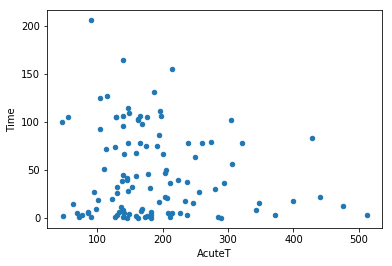

In [170]:
df.plot.scatter(x='AcuteT', y='Time')

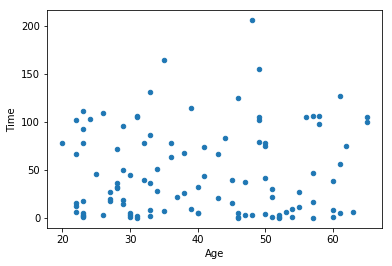

In [171]:
df.plot.scatter(x='Age', y='Time')

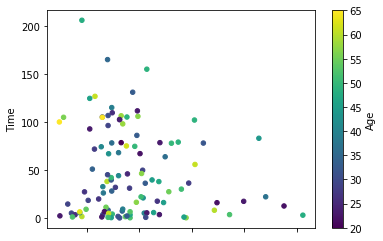

In [172]:
df.plot.scatter('AcuteT', 'Time', c='Age', colormap='viridis')

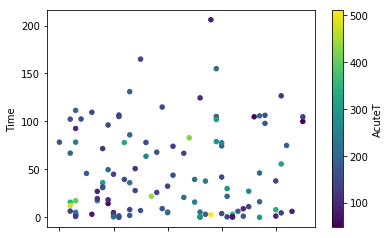

In [173]:
df.plot.scatter(x='Age', y='Time', c='AcuteT', colormap='viridis')

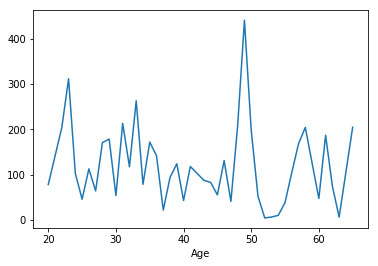

In [174]:
df.groupby('Age')['Time'].sum().plot()

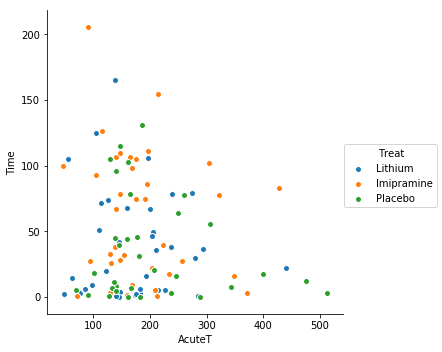

In [175]:
sns.pairplot(x_vars=["AcuteT"], y_vars=["Time"], data=df, hue="Treat", size=5)

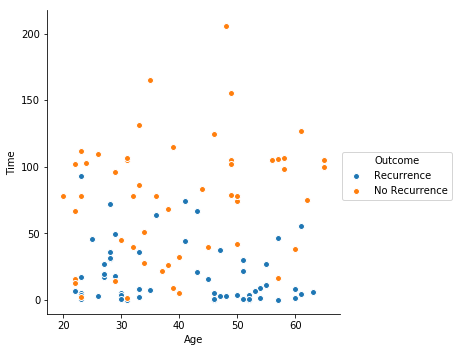

In [180]:
sns.pairplot(x_vars=["Age"], y_vars=["Time"], data=df, hue="Outcome", size=5)

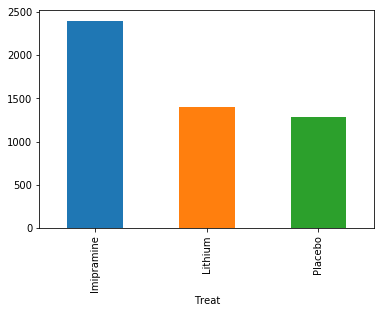

In [176]:
df.groupby('Treat')['Time'].sum().plot.bar()

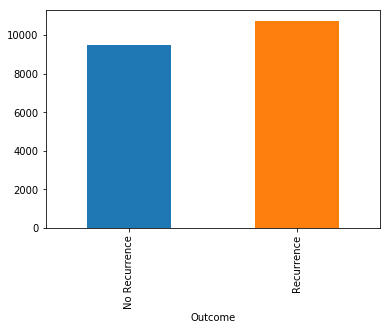

In [177]:
df.groupby('Outcome')['AcuteT'].sum().plot.bar()

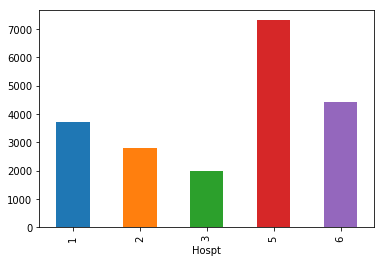

In [178]:
df.groupby('Hospt')['AcuteT'].sum().plot.bar()